In [1]:
import pandas as pd

In [3]:
from sklearn.datasets import load_digits
digit = load_digits()

In [4]:
dir(digit)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

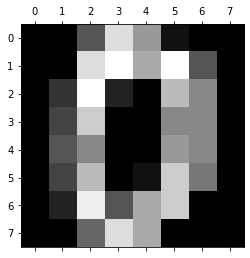

In [11]:
plt.gray()
plt.matshow(digit.images[0])

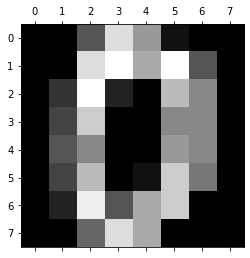

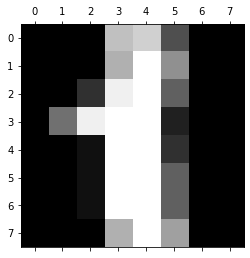

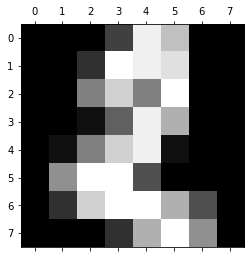

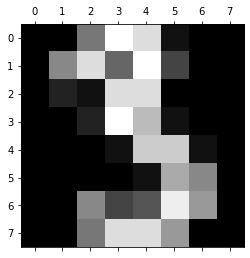

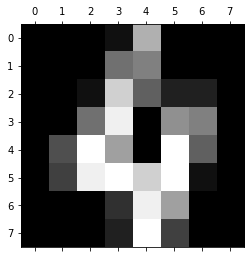

In [12]:
for i in range(5):
    plt.matshow(digit.images[i])

In [15]:
df = pd.DataFrame(digit.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
target = pd.DataFrame(digit.target)
target.head()

,0
0,0
1,1
2,2
3,3
4,4


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

In [19]:
len(X_train)

1257

In [20]:
len(X_test)

540

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [22]:
model.fit(X_train, y_train)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
model.score(X_test, y_test)

0.9740740740740741

In [26]:
y_predicted = model.predict(X_test)

### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  1,  0,  1,  1,  2,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 57]], dtype=int64)

In [31]:
import seaborn as sns

Text(105.0, 0.5, 'Truth')

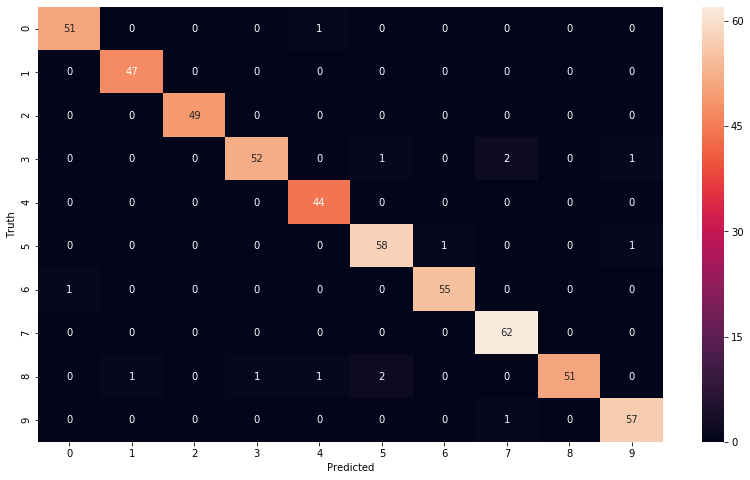

In [36]:
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')